# Récupération des données

In [4]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pyquickhelper.ipythonhelper import add_notebook_menu
add_notebook_menu()

Populating the interactive namespace from numpy and matplotlib


Ce notebook donne quelques exemples de codes qui permettent de récupérer les données utilisées par d'autres notebooks.

### Population française janvier 2015

Les données sont disponibles sur le site de l'INSEE [Pyramide des âges au 1er janvier 2015](http://www.insee.fr/fr/themes/tableau.asp?ref_id=ccc). Elles sont disponibles au format Excel avec le lien suivant : ``http://www.insee.fr/fr/ffc/figure/ccc.xls``. Le format n'est pas le plus simple car la première feuille inclut deux tables.

In [2]:
url = "http://www.insee.fr/fr/ffc/figure/ccc.xls"
import pandas
df=pandas.read_excel(url, sheetname=0)
df.head(n=3)

,Pyramide des âges au 1er janvier 2015,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Champ : France y compris Mayotte,NaN,NaN,NaN,NaN,NaN,NaN
1,"Source : Insee, estimations de population (don...",NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail(n=3)

,Pyramide des âges au 1er janvier 2015,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
108,1916,98,1882,8903,10785,NaN,-1882
109,1915,99,1629,7198,8827,NaN,-1629
110,1914 ou avant,100 ou plus,3756,20458,24214,NaN,-3756


La récupération de ces données est implémentée dans la fonction *population_france_2015* :

In [1]:
from actuariat_python.data import population_france_2015
df = population_france_2015()

In [2]:
df.head(n=3)

,naissance,age,hommes,femmes,ensemble
10,2014,0,403837,386619,790456
11,2013,1,404502,386726,791228
12,2012,2,411217,393181,804398


In [3]:
df.tail(n=3)

,naissance,age,hommes,femmes,ensemble
108,1916,98,1882,8903,10785
109,1915,99,1629,7198,8827
110,1914,100,3756,20458,24214


D'après cette table, il y a plus de personnes âgées de 110 ans que de 109 ans. C'est dû au fait que la dernière ligne aggrège toutes les personnes âgées de plus de 110 ans.

### Table de mortalité 2000-2002 (France)

On utilise quelques raccourcis afin d'éviter d'y passer trop de temps. Les données sont fournis au format Excel à l'adresse : http://www.institutdesactuaires.com/gene/main.php?base=314.

In [1]:
from actuariat_python.data import table_mortalite_france_00_02
df=table_mortalite_france_00_02()
df.head()

,Age,Homme,Femme
0,NaN,NaN,NaN
1,0,100000,100000
2,1,99511,99616
3,2,99473,99583
4,3,99446,99562


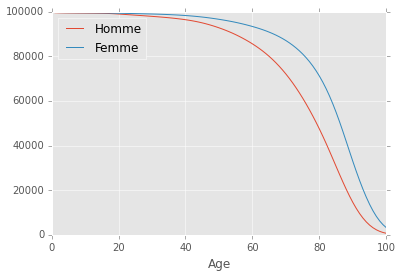

In [6]:
df.plot(x="Age",y=["Homme", "Femme"],xlim=[0,100])

### Taux de fécondité (France)

On procède de même pour cette table.

In [1]:
from actuariat_python.data import fecondite_france
df=fecondite_france()
df.head()

,age,2004,2014
3,15,0,0
4,16,2,2
5,17,6,5
6,18,12,9
7,19,22,18


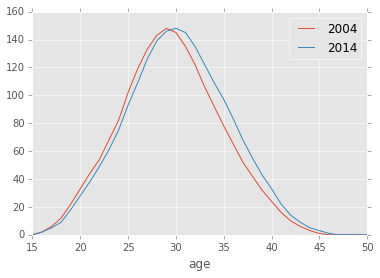

In [5]:
df.plot(x="age", y=["2004","2014"])